# Zadanko 4 | Task 4

**[PL]**
Celem tego zadania jest symulacja przesłania zakodowanej wiadomości

**[EN]**.
The purpose of this task is to simulate the transmission of an encoded message

## Podpunkt a | Subpoint a

**[PL]**
Wygeneruj losową macierz o 10 kolumnach i 4 wierszach o wyrazach z ciała Z5 

**[EN]**
Generate a random matrix with 10 columns and 4 rows with words from the  Z5 field



In [1]:
import sympy as sp
from sympy import Matrix, pprint
import numpy as np
import matplotlib.pyplot as plt
import random
from random import choices
import itertools
from scipy.spatial.distance import hamming

In [2]:
def hamming_distance(a, b):
    if not (isinstance(a, list) and isinstance(b, list)):
        return int(hamming(list(a), list(b)) * len(a))
    return int(hamming(a, b) * len(a))

In [3]:
G = Matrix( 4, 10, lambda i, j: random.randint(0, 4))

## Podpunkt b | Subpoint b

**[PL]**
Dokonaj unormowania macierzy z podpunktu a) do przedziału [0, 1] dzieląc wszystkie wyrazy macierzy przez 4   
(w tym podpunkcie potraktuj elementy macierzy jako liczby całkowite, a nie elementy z ciała Z5 , czyli dzielenie przez 4 to standardowa operacja dzielenia na dwóch liczbach całkowitych). Na podstawie unormowanej macierzy utwórz obraz

**[EN]**
Normalize the matrix from subsection (a) to the interval [0, 1] by dividing all expressions of the matrix by 4  
(in this subsection, treat the elements of the matrix as integers, not elements from the field of Z5 , that is, dividing the dividing by 4 is a standard division operation on two integers). Based on the normalized matrix create the image

In [4]:
float_matrix_G = G.evalf() /4
pprint(float_matrix_G)
numpy_array_G = np.array(float_matrix_G.tolist()).astype('float64')

⎡0.75  0.75  1.0    0     0    0.75  0.25  0.75  0.5  0.25⎤
⎢                                                         ⎥
⎢0.75  0.75  0.75  0.75  1.0   1.0   0.75  0.75  0.5  1.0 ⎥
⎢                                                         ⎥
⎢0.75  1.0   0.25  1.0    0    0.5    0    0.25  1.0  0.25⎥
⎢                                                         ⎥
⎣0.25  0.5   0.25  0.25  0.25  0.25  0.5    0    1.0  0.5 ⎦


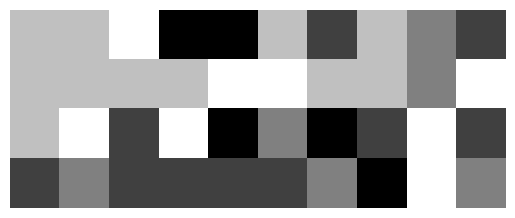

In [5]:
plt.imshow(numpy_array_G, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()

## Podpunkt d | Subpoint d

**[PL]**
Dla dowolnej kolumny v macierzy z podpunktu a) zakoduj wektor v używajac macierzy generujacej G.

**[EN]**
For any column v of the matrix in subsection (a), encode the vector v using the generating matrix G.


In [6]:
random_column_index = random.randint(0, G.shape[1] - 1)

v = G[:, random_column_index]
w = (v.T * G).T % 5
w

Matrix([
[0],
[2],
[2],
[4],
[3],
[2],
[0],
[2],
[2],
[4]])

## Podpunkt e | Subpoint e

**[PL]**
Dla każdego zakodowanego wektora z podpunktu d) zasymuluj wysłanie go do pewnego użytkownika poprzez kanał, który dla przesyłanego wektora v dla każdej pozycji dodaje modulo 5 losową liczbę ze zbioru {0, 3}, przy czym prawdopodobieństwo dodania liczby 0 wynosi 0.95, zaś prawdopodobieństwo dodania 3 jestrówne 0.05.

**[EN]**
For each encoded vector from subsection (d), simulate sending it to some user through a channel that, for the transmitted vector v, for each position adds modulo 5 a random number from the set {0, 3}, where the probability of adding the number 0 is 0.95, and the probability of adding 3 is equal to 0.05.

In [7]:
coded_vectors=[]

In [8]:
for i in range(10):
  vec = (G[:,i].T * G).T %5
  vec_new=None


  result = [choices([0, 3], [0.95, 0.05])[0] for _ in range(10)]
  vec_new = vec+   Matrix(result)
  vec_new%=5

  coded_vectors.append(vec_new)


In [9]:
pprint(coded_vectors)

⎡⎡3⎤  ⎡2⎤  ⎡0⎤  ⎡2⎤  ⎡3⎤  ⎡3⎤  ⎡4⎤  ⎡1⎤  ⎡3⎤  ⎡0⎤⎤
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢2⎥  ⎢3⎥  ⎢2⎥  ⎢2⎥  ⎢4⎥  ⎢1⎥  ⎢1⎥  ⎢2⎥  ⎢1⎥  ⎢3⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢2⎥  ⎢2⎥  ⎢4⎥  ⎢3⎥  ⎢2⎥  ⎢0⎥  ⎢2⎥  ⎢2⎥  ⎢4⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢2⎥  ⎢2⎥  ⎢4⎥  ⎢1⎥  ⎢3⎥  ⎢1⎥  ⎢1⎥  ⎢3⎥  ⎢1⎥  ⎢3⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢3⎥  ⎢4⎥  ⎢3⎥  ⎢3⎥  ⎢2⎥  ⎢2⎥  ⎢4⎥  ⎢2⎥  ⎢0⎥  ⎢3⎥⎥
⎢⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥, ⎢ ⎥⎥
⎢⎢3⎥  ⎢1⎥  ⎢2⎥  ⎢1⎥  ⎢2⎥  ⎢0⎥  ⎢2⎥  ⎢3⎥  ⎢1⎥  ⎢3⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢4⎥  ⎢1⎥  ⎢0⎥  ⎢1⎥  ⎢4⎥  ⎢2⎥  ⎢4⎥  ⎢2⎥  ⎢1⎥  ⎢2⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢1⎥  ⎢2⎥  ⎢2⎥  ⎢3⎥  ⎢2⎥  ⎢3⎥  ⎢2⎥  ⎢4⎥  ⎢1⎥  ⎢1⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎢⎢3⎥  ⎢1⎥  ⎢2⎥  ⎢1⎥  ⎢2⎥  ⎢1⎥  ⎢1⎥  ⎢4⎥  ⎢0⎥  ⎢2⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
⎣⎣0⎦  ⎣3⎦  ⎣4⎦  ⎣3⎦  ⎣3⎦  ⎣3⎦  ⎣2⎦  ⎣1⎦  ⎣2⎦  ⎣2⎦⎦


## Podpunkt f | Subpoint f

**[PL]**
Dla każdego zakodowanego wektora po przesłaniu go przez kanał odkoduj ten wektor używając algorytmu MinimizeHammingDistance.

**[EN]**.
For each encoded vector after it is transmitted through the channel, decode that vector using the algorithm MinimizeHammingDistance.

In [10]:
def find_coords(B: Matrix, modulus: int,v):
    code_words = []
    for x in itertools.product(range(modulus), repeat = B.shape[1]):
        code_word = (B * Matrix(x)) % modulus
        if code_word==v:
            return x

# Find the minimal hamming distance
def find_minimal_distance(v: Matrix, G: Matrix):
    min_distance = len(v)
    for x in itertools.product(range(5), repeat=4):
        vector = (Matrix(x).T * G).T % 5
        distance = hamming_distance(v, vector)
        if distance < min_distance:
            min_distance = distance
    return min_distance

# Generate the minimal distance subspace for vector v from Z^4 modulo 5 and generative matrix G
def generate_minimal_distance_subspace(v: Matrix, G: Matrix):
    min_distance = find_minimal_distance(v, G)
    subspace = []
    for x in itertools.product(range(5), repeat=4):
        vector = (Matrix(x).T * G).T % 5
        if hamming_distance(v, vector) == min_distance and vector not in subspace:
            subspace.append(vector)
    return subspace

# Choose random vector from the space
def choose_random_vector(S: list):
    return S[random.randint(0, len(S) - 1)]

# Implement the minimize hamming distance algorithm
def minimize_hamming_distance(v: Matrix, G: Matrix):
    w = choose_random_vector(generate_minimal_distance_subspace(v, G))
    r = find_coords(G.T,5,w)
    return Matrix(list(r))




In [11]:
encoded_vectors=[]

In [12]:
for i in range(10):
  vec_to_encode=coded_vectors[i]
  vec_enc = minimize_hamming_distance(vec_to_encode,G)
  encoded_vectors.append(list(vec_enc))

## Podpunkt g | Subpoint g

**[PL]**
Z odkodowanych wektorów utwórz macierz odpowiadającą macierzy kodowanej z podpunktu a)

**[EN]**
From the decoded vectors, create a matrix corresponding to the encoded matrix from subsection a)

In [13]:
G_2 = Matrix(encoded_vectors).T
pprint(G_2)


⎡3  3  4  0  0  3  1  3  2  1⎤
⎢                            ⎥
⎢3  3  3  3  4  4  3  3  2  4⎥
⎢                            ⎥
⎢3  4  1  4  0  2  0  1  4  1⎥
⎢                            ⎥
⎣1  2  1  1  1  1  2  0  4  2⎦


## Podpunkt h | Subpoint h

**[PL]**
Porównaj macierze z podpunktu a) i g). Ile kolumn macierzy z podpunktu a) zostało poprawnie odkodowanych?

**[EN]**
Compare the matrices from subsection (a) and (g). How many columns of the matrix from subsection (a) were decoded correctly?

In [14]:
pprint(G)
print('------------------------------------------')
pprint(G_2)

⎡3  3  4  0  0  3  1  3  2  1⎤
⎢                            ⎥
⎢3  3  3  3  4  4  3  3  2  4⎥
⎢                            ⎥
⎢3  4  1  4  0  2  0  1  4  1⎥
⎢                            ⎥
⎣1  2  1  1  1  1  2  0  4  2⎦
------------------------------------------
⎡3  3  4  0  0  3  1  3  2  1⎤
⎢                            ⎥
⎢3  3  3  3  4  4  3  3  2  4⎥
⎢                            ⎥
⎢3  4  1  4  0  2  0  1  4  1⎥
⎢                            ⎥
⎣1  2  1  1  1  1  2  0  4  2⎦


## Podpunkt i | Subpoint i

**[PL]**
Wyrazy odkodowanej macierzy z podpunktu g) unormuj do przedziału [0, 1] analogiczną metodą jak w podpunkcie b)

 Następnie dla unormowanej macierzy utwórz obraz analogicznie jak w podpunkcie b)

 **[EN]**
Normalize the expressions of the decoded matrix from subsection (g) to the interval [0, 1] using the analogous method as in subsection (b).  
 Then, for the normalized matrix, create an image analogously as in subsection (b)

In [15]:
float_matrix_G2 = G_2.evalf() /4
numpy_array_G2 = np.array(float_matrix_G2.tolist()).astype('float64')

pprint(float_matrix_G2)

⎡0.75  0.75  1.0    0     0    0.75  0.25  0.75  0.5  0.25⎤
⎢                                                         ⎥
⎢0.75  0.75  0.75  0.75  1.0   1.0   0.75  0.75  0.5  1.0 ⎥
⎢                                                         ⎥
⎢0.75  1.0   0.25  1.0    0    0.5    0    0.25  1.0  0.25⎥
⎢                                                         ⎥
⎣0.25  0.5   0.25  0.25  0.25  0.25  0.5    0    1.0  0.5 ⎦


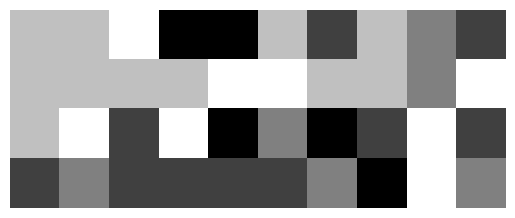

In [16]:
plt.imshow(numpy_array_G2, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()

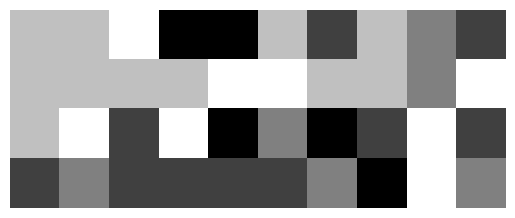

In [17]:
plt.imshow(numpy_array_G, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.show()